In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y         (20, 40]  (40, 60]  (60, 80]  (80, 100]  All
x                                                     
(10, 30]         1         0         1          4    6
(30, 50]         1         1         3          0    5
(50, 70]         2         3         1          0    6
(70, 90]         3         0         0          0    3
All              7         4         5          4   20 

y         (20, 40]  (40, 60]  (60, 80]  (80, 100]   All
x                                                      
(10, 30]      0.05      0.00      0.05        0.2  0.30
(30, 50]      0.05      0.05      0.15        0.0  0.25
(50, 70]      0.10      0.15      0.05        0.0  0.30
(70, 90]      0.15      0.00      0.00        0.0  0.15
All           0.35      0.20      0.25        0.2  1.00


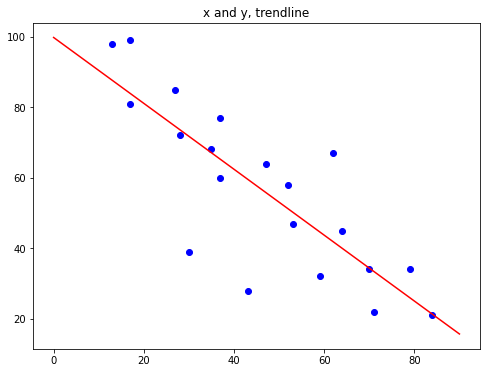

In [270]:
df = pd.read_csv('../商务与经济统计/数据文件/第2章/Crosstab2.csv',usecols=[0,1,2],index_col=0)

bins1 = pd.interval_range(start=10,periods=4,freq=20)
bins2 = pd.interval_range(start=20,periods=4,freq=20)
a1 = pd.cut(df.x,bins1).map(lambda x: str(x))
a2 = pd.cut(df.y,bins2).map(lambda x: str(x))

tmp = pd.concat([a1,a2],axis=1)
tb = pd.crosstab(tmp.x,tmp.y,margins=True)
print(tb,'\n')

tb = pd.crosstab(tmp.x,tmp.y,margins=True,normalize='all')
print(tb)

model = LinearRegression()
model.fit(df.x.values.reshape(-1,1),df.y)
model.coef_
model.intercept_
x = np.arange(0,90,0.01)
y = model.intercept_+model.coef_*x

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(df.x,df.y,color='b')
ax.plot(x,y,color='r')
ax.set_title('x and y, trendline')
plt.show()

## 2.5 数据可视化：创建有效图形显示的最佳实践

### 44

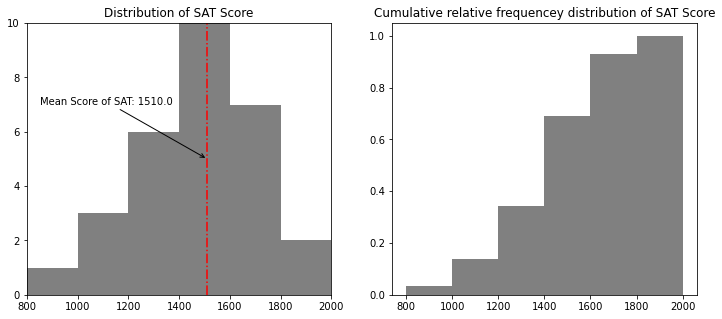

In [161]:
df = pd.read_csv('../商务与经济统计/数据文件/第2章/NewSAT.csv')
mscore = df['SAT Scores'].mean()
fig, ax=plt.subplots(1,2, figsize=(12,5))
ax[0].hist(df,bins=np.arange(800,2200,200),color='grey')
ax[0].set_title('Distribution of SAT Score')
ax[0].vlines(mscore,ymin=0,ymax=10,color='r',linestyles='-.')
ax[0].set_xlim(800,2000)
ax[0].annotate("Mean Score of SAT: {}".format(mscore), xy=(mscore,5), xytext=(850,7),
             arrowprops=dict(arrowstyle='->',facecolor="red"))
ax[0].set_ylim(0,10)

ax[1].hist(df,bins=np.arange(800,2200,200),color='grey',cumulative=True,density=True)
ax[1].set_title('Cumulative relative frequencey distribution of SAT Score')
plt.show()

b. 典型的正态分布图，几乎对称

c. 均值为1510

## 46

Relative Frequency Distribution:

(0.0, 2.5]      15
(2.5, 5.0]      14
(5.0, 7.5]       9
(7.5, 10.0]      5
(12.5, 15.0]     2
(17.5, 20.0]     2
(10.0, 12.5]     1
(25.0, 27.5]     1
(35.0, 37.5]     1
(15.0, 17.5]     0
(20.0, 22.5]     0
(22.5, 25.0]     0
(27.5, 30.0]     0
(30.0, 32.5]     0
(32.5, 35.0]     0
Name: Population, dtype: int64 


Percent Frequency Distribution:

(0.0, 2.5]      30%
(2.5, 5.0]      28%
(5.0, 7.5]      18%
(7.5, 10.0]     10%
(12.5, 15.0]     4%
(17.5, 20.0]     4%
(10.0, 12.5]     2%
(25.0, 27.5]     2%
(35.0, 37.5]     2%
(15.0, 17.5]     0%
(20.0, 22.5]     0%
(22.5, 25.0]     0%
(27.5, 30.0]     0%
(30.0, 32.5]     0%
(32.5, 35.0]     0%
Name: Population, dtype: object


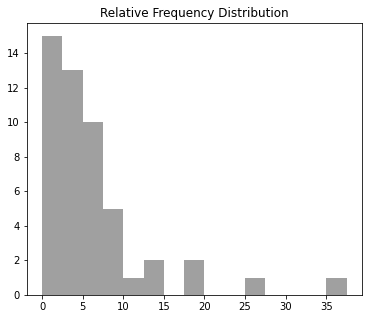

In [234]:
df = pd.read_csv('../商务与经济统计/数据文件/第2章/2012Population.csv')

# pd.cut(df.Population,bins=np.arange(0,40,2.5))
tmp = pd.cut(df.Population,bins=np.arange(0,40,2.5))
print('Relative Frequency Distribution:\n')
print(tmp.value_counts(),'\n\n')
print('Percent Frequency Distribution:\n')
print((tmp.value_counts()/tmp.count()).map(lambda x: str(int(x*100))[:2]+'%'))


fig,ax = plt.subplots(1,1,figsize=(6,5))
ax.hist(df.Population, bins=np.arange(0,40,2.5),histtype='bar',alpha=0.75,color='grey')
ax.set_title('Relative Frequency Distribution')
plt.show()

### 48

In [214]:
df = pd.read_csv('../商务与经济统计/数据文件/第2章/BBB.csv',usecols=[0])

In [221]:
print('Relative Frequency Distribution:\n')
print(df.Industry.value_counts(),'\n\n')
print('Percent Frequency Distribution:\n')
print((df.Industry.value_counts()/df.Industry.count()).map(lambda x: str(int(x*100))[:2]+'%'))

Relative Frequency Distribution:

Cell          60
Cable         44
Car           42
Collection    28
Bank          26
Name: Industry, dtype: int64 


Percent Frequency Distribution:

Cell          30%
Cable         22%
Car           21%
Collection    14%
Bank          13%
Name: Industry, dtype: object


<ipython-input-233-c07e35aba02c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ticks)


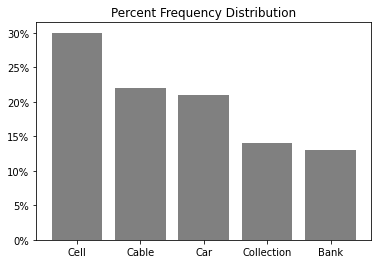

In [233]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
percent = df.Industry.value_counts() / df.Industry.count()
ticks = [str(x)+'%' for x in range(0,31,5)]
ax.bar(percent.index,percent,color='grey')
ax.set_title("Percent Frequency Distribution")
ax.set_yticklabels(ticks)
plt.show()

### 50

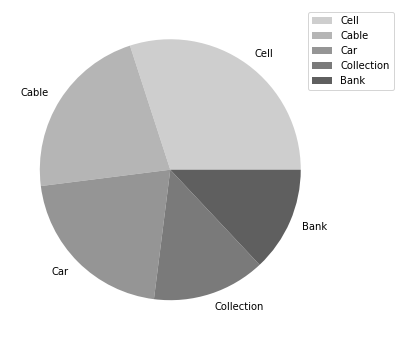

In [266]:
plt.figure(figsize=(12,6))
plt.pie(percent,normalize=False,colors=plt.get_cmap('Greys')(np.linspace(0.3, 0.7, 5)),labels=percent.index)
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()